*Objective of the problem*

Given a list of more than 1000+ text (dataset attached) from news publications around the globe:

1. Clean the dataset- drop rows with missing/ incorrect data

2. Write a data frame query to find all names of UNIQUE sources and retrieve their count i.e., number of articles from each source.

 > Create a suitable visualization representing each news source and number of articles. Which news websites has the maximum number of articles?

 > Perform the same process to get names of all authors and articles written by each. Plot a visualization for the same. 

3. Have 2 or more authors written more than 1 article together? 
   
 > If yes, represent with a suitable visualization/ table with names of authors who have collaborated/ worked together and the count/number of the articles for each pair. 

Dataset contains `title`	`publication`	`author`	`date`	`year`	`month`	`content` as columns


# Initialisation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

In [2]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
#@title
!git clone https://github.com/SanKalp4/NLP/

Cloning into 'NLP'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 91 (delta 31), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (91/91), done.


In [4]:
df= pd.read_csv('/content/NLP/News article mining and cleaning/Dataset/DS-assignment-News-NLP.csv')
df.head(8)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,5,6,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,2

,Unnamed: 0,title,publication,author,date,year,month,content,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 489,Unnamed: 490,Unnamed: 491,Unnamed: 492,Unnamed: 493,Unnamed: 494,Unnamed: 495,Unnamed: 496,Unnamed: 497,Unnamed: 498,Unnamed: 499,Unnamed: 500,Unnamed: 501,Unnamed: 502,Unnamed: 503,Unnamed: 504,Unnamed: 505,Unnamed: 506,Unnamed: 507,Unnamed: 508,Unnamed: 509,Unnamed: 510,Unnamed: 511,Unnamed: 512,Unnamed: 513,Unnamed: 514,Unnamed: 515,Unnamed: 516,Unnamed: 517,Unnamed: 518,Unnamed: 519,Unnamed: 520,Unnamed: 521,Unnamed: 522,Unnamed: 523,Unnamed: 524,Unnamed: 525,Unnamed: 526,Unnamed: 527,Unnamed: 528
0,0,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,31-12-2016,2016,12,WASHINGTON — Congressional Republicans have...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,19-06-2017,2017,6,"After the bullet shells get counted, the blood...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,06-01-2017,2017,1,"When Walt Disney’s “Bambi” opened in 1942, cri...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,10-04-2017,2017,4,"Death may be the great equalizer, but it isn’t...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,02-01-2017,2017,1,"SEOUL, South Korea — North Korea’s leader, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,"Sick With a Cold, Queen Elizabeth Misses New Y...",New York Times,Sewell Chan,02-01-2017,2017,1,"LONDON — Queen Elizabeth II, who has been b...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,Taiwan’s President Accuses China of Renewed In...,New York Times,Javier C. Hernández,02-01-2017,2017,1,BEIJING — President Tsai of Taiwan sharpl...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [5]:
# Removing all the unnamed columns with NaN values from dataframe
df1 = df.loc[:, ~df.columns.str.match('Unnamed')]
df1.head(2)

,title,publication,author,date,year,month,content
0,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,31-12-2016,2016,12,WASHINGTON — Congressional Republicans have...
1,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,19-06-2017,2017,6,"After the bullet shells get counted, the blood..."


In [6]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [7]:
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Cleaning the Dataset

In [8]:
# #content data cleaning [Stemming]
# cleaned_content=[]
# #stemmer requires a language parameter
# ss = SnowballStemmer(language='english')
# for i in range(len(df1)):
#   Content=re.sub('[^A-Za-z0-9-]',' ',str(df1['content'][i])) # punctuation removal
#   Content=Content.lower() # lowering alphabet
#   Content = nltk.word_tokenize(Content) # tokenization
#   Content=[ss.stem(word) for word in Content if word not in stopwords.words('english')] # stopwords removal and stemming
#   Content=" ".join(Content)
#   cleaned_content.append(Content)

In [9]:
#content data cleaning [Lemmatization]

cleaned_content=[]
#the stemmer requires a language parameter
#ss = SnowballStemmer(language='english')
lemmatizer = WordNetLemmatizer()
for i in range(len(df1)):
  C1=re.sub('[^A-Za-z0-9-]',' ',str(df1['content'][i])) # punctuation removal
  C1=C1.lower() # lowering alphabet
  C1 = nltk.word_tokenize(C1) # tokenization
  C1=[lemmatizer.lemmatize(word1) for word1 in C1 if word1 not in stopwords.words('english')] # stopwords removal and stemming
  C1=" ".join(C1)
  cleaned_content.append(C1)
cleaned_content

['washington congressional republican new fear come health care lawsuit obama administration might win incoming trump administration could choose longer defend executive branch suit challenge administration authority spend billion dollar health insurance subsidy american handing house republican big victory issue sudden loss disputed subsidy could conceivably cause health care program implode leaving million people without access health insurance republican prepared replacement could lead chaos insurance market spur political backlash republican gain full control government stave outcome republican could find awkward position appropriating huge sum temporarily prop obama health care law angering conservative voter demanding end law year another twist donald j trump administration worried preserving executive branch prerogative could choose fight republican ally house central question dispute eager avoid ugly political pileup republican capitol hill trump transition team gaming handle l

In [11]:
df1['cleaned_content']=pd.DataFrame(cleaned_content)
df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,title,publication,author,date,year,month,content,cleaned_content
0,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,31-12-2016,2016,12,WASHINGTON — Congressional Republicans have...,washington congressional republican new fear c...
1,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,19-06-2017,2017,6,"After the bullet shells get counted, the blood...",bullet shell get counted blood dry votive cand...
2,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,06-01-2017,2017,1,"When Walt Disney’s “Bambi” opened in 1942, cri...",walt disney bambi opened 1942 critic praised s...
3,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,10-04-2017,2017,4,"Death may be the great equalizer, but it isn’t...",death may great equalizer necessarily evenhand...
4,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,02-01-2017,2017,1,"SEOUL, South Korea — North Korea’s leader, ...",seoul south korea north korea leader kim said ...


In [12]:
# #title data cleaning
# cleaned_title=[]
# #the stemmer requires a language parameter
# #ss = SnowballStemmer(language='english')
# lemmatizer = WordNetLemmatizer()
# for i in range(len(df1)):
#   C2=re.sub('[^a-zA-Z]',' ',str(df1['title'][i])) # punctuation removal
#   C2=C2.lower() # lowering alphabet
#   C2 = nltk.word_tokenize(C2) # tokenization
#   C2=[lemmatizer.lemmatize(word2) for word2 in C2 if word2 not in stopwords.words('english')] # stopwords removal and stemming
#   C2=" ".join(C2)
#   cleaned_title.append(C2)

In [13]:
# df1['cleaned_title']=pd.DataFrame(cleaned_title)
# df1.head()

In [14]:
df1.drop(columns = ['content'], inplace = True)
df1= df1[['title','publication','author','date','month','year','cleaned_content']]
df1.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,title,publication,author,date,month,year,cleaned_content
0,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,31-12-2016,12,2016,washington congressional republican new fear c...
1,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,19-06-2017,6,2017,bullet shell get counted blood dry votive cand...
2,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,06-01-2017,1,2017,walt disney bambi opened 1942 critic praised s...
3,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,10-04-2017,4,2017,death may great equalizer necessarily evenhand...
4,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,02-01-2017,1,2017,seoul south korea north korea leader kim said ...


In [15]:
#null values checking and removal
df1.isnull().sum()

title              10
publication        10
author             77
date               13
month              13
year               13
cleaned_content     0
dtype: int64

In [16]:
df1= df1.dropna()
df1.isnull().sum()

title              0
publication        0
author             0
date               0
month              0
year               0
cleaned_content    0
dtype: int64

In [17]:
df1.shape

(2229, 7)

In [18]:
df2=df1.copy(deep=True)

In [19]:
#extracting authors in a list from dataframe
for i in df2[['author']]:
  a=df2[i]
authorlist = a.values.tolist()
print(authorlist)  

['Carl Hulse', 'Benjamin Mueller and Al Baker', 'Margalit Fox', 'William McDonald', 'Choe Sang-Hun', 'Sewell Chan', 'Javier C. Hernández', 'Gina Kolata', 'Katherine Rosman', 'Andy Newman', 'Justin Gillis', 'John Schwartz', 'Maggie Haberman', 'Charles Duhigg', 'Stephanie Rosenbloom', 'Emma G. Fitzsimmons', 'Kevin Sack and Alan Blinder', 'Geeta Anand', 'The Associated Press', 'Brett Cole', 'Benjamin Hoffman', 'Patrick Healy', 'Marlise Simons', 'Guy Trebay and Jacob Bernstein', 'Jennifer Steinhauer', 'Carl Hulse', 'Charles McDermid', 'Sheri Fink and Helene Cooper', 'Tim Arango', 'Mark Landler', 'Michelle Higgins', 'Isabel Kershner', 'Alissa J. Rubin', 'Ian Austen', 'Simon Romero', 'Kenneth Chang', 'Corey Kilgannon', 'Jennifer Schuessler', 'John Otis', 'Eric Lipton and Matt Flegenheimer', 'Sean Alfano', 'Jennifer Steinhauer and Robert Pear', 'Binyamin Appelbaum', 'Scott Shane, Maggie Haberman and Julie Hirschfeld Davis', 'Adam Nagourney', 'Isabel Kershner', 'Gretchen Reynolds', 'Damon Darl

In [20]:
authorlist

['Carl Hulse',
 'Benjamin Mueller and Al Baker',
 'Margalit Fox',
 'William McDonald',
 'Choe Sang-Hun',
 'Sewell Chan',
 'Javier C. Hernández',
 'Gina Kolata',
 'Katherine Rosman',
 'Andy Newman',
 'Justin Gillis',
 'John Schwartz',
 'Maggie Haberman',
 'Charles Duhigg',
 'Stephanie Rosenbloom',
 'Emma G. Fitzsimmons',
 'Kevin Sack and Alan Blinder',
 'Geeta Anand',
 'The Associated Press',
 'Brett Cole',
 'Benjamin Hoffman',
 'Patrick Healy',
 'Marlise Simons',
 'Guy Trebay and Jacob Bernstein',
 'Jennifer Steinhauer',
 'Carl Hulse',
 'Charles McDermid',
 'Sheri Fink and Helene Cooper',
 'Tim Arango',
 'Mark Landler',
 'Michelle Higgins',
 'Isabel Kershner',
 'Alissa J. Rubin',
 'Ian Austen',
 'Simon Romero',
 'Kenneth Chang',
 'Corey Kilgannon',
 'Jennifer Schuessler',
 'John Otis',
 'Eric Lipton and Matt Flegenheimer',
 'Sean Alfano',
 'Jennifer Steinhauer and Robert Pear',
 'Binyamin Appelbaum',
 'Scott Shane, Maggie Haberman and Julie Hirschfeld Davis',
 'Adam Nagourney',
 'Isabe

In [21]:
auth=[]
for element in authorlist:
  auth.append(len(element))

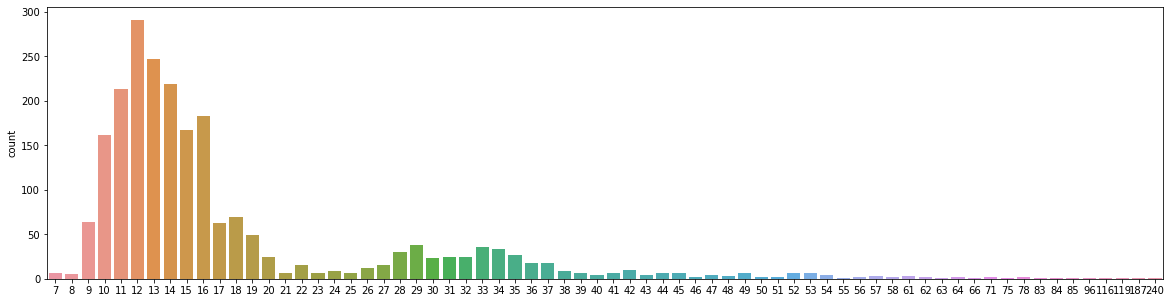

In [22]:
plt.figure(figsize=(20,5))
sns.countplot(x=auth)

From the above plot we can see the distribution of string length of authors in pursuit of removing garbage values

In [23]:
# similarly extracting publications in a list and then cleaning them
for i in df2[['publication']]:
  a1=df2[i]
publication_list= a1.tolist()
publication_list

['New York Times',
 'New York Times',
 'New York Times',
 'New York Times',
 'New York Times',
 'New York Times',
 'New York Times',
 'New York Times',
 'New York Times',
 'New York Times',
 'New York Times',
 'New York Times',
 'New York Times',
 'New York Times',
 'New York Times',
 'New York Times',
 'New York Times',
 'New York Times',
 'New York Times',
 'New York Times',
 'New York Times',
 'New York Times',
 'New York Times',
 'New York Times',
 'New York Times',
 'New York Times',
 'New York Times',
 'New York Times',
 'New York Times',
 'New York Times',
 'New York Times',
 'New York Times',
 'New York Times',
 'New York Times',
 'New York Times',
 'New York Times',
 'New York Times',
 'New York Times',
 'New York Times',
 'New York Times',
 'New York Times',
 'New York Times',
 'New York Times',
 'New York Times',
 'New York Times',
 'New York Times',
 'New York Times',
 'New York Times',
 'New York Times',
 'New York Times',
 'New York Times',
 'New York Times',
 'New York T

In [24]:
pub=[]
for element in publication_list:
  pub.append(len(element))

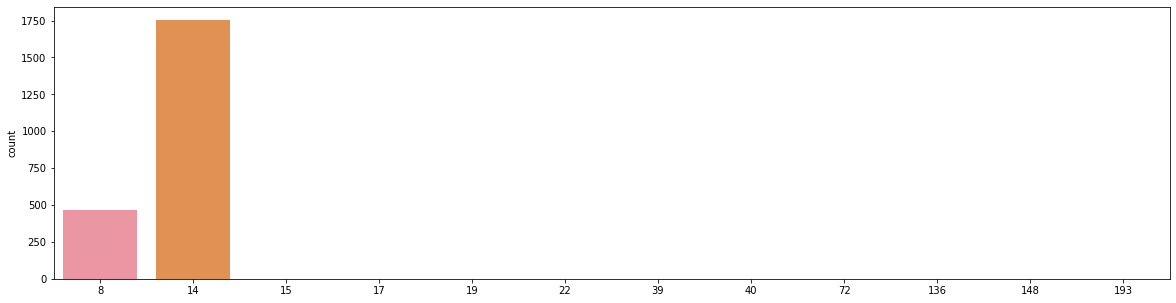

In [25]:
plt.figure(figsize=(20,5))
sns.countplot(x=pub)

From above plot it is evident that significant string length of publications are 0-14

In [26]:
source_count = df2.groupby(['publication']).agg({'title':'count'}).sort_values(by=['title'],ascending=False).reset_index()
source_count.head(10)

,publication,title
0,New York Times,1754
1,Guardian,238
2,Atlantic,226
3,Medicaid or their employers) annual rate incr...,1
4,Senator,1
5,a of the Feminist Majority Foundation,1
6,at the Trump International Hotel in Las Vegas...,1
7,can become a journeyman in three years,1
8,much of the time,1
9,not a Democrat,1


Rechecking with string length of 'New York Times' == 14

In [27]:
df3=df2.copy(deep=True)

With extensive data wrangling in subsequent lines of code by listing authorlist and using OR instead of AND in the next line code we found biggest string in author with valid author name was of char length `96` for `Nicholas Kulish, Vivian Yee, Caitlin Dickerson, Liz Robbins, Fernanda Santos and Jennifer Medina` but it wont matter as most will be filtered out with valid publication char length of `14` for `'New York Times'`

In [28]:
df_not=df3[(df3['author'].apply(lambda x: len(x)>1) & df3['publication'].apply(lambda y: len(y)>14))] 
#taking author length as 1 since 1 record with Ivanka(char length 6) as author is actually a garbage value all along the row
df_not.head(20)

,title,publication,author,date,month,year,cleaned_content
73,we had been talking about ghosts,” Aroche told me. “Now,we could prove it. We started putting names o...,there have been no political repercussions fo...,Aroche was thumbing through an envelope of do...,a small room facing a courtyard in a crumblin...,aroche said sorry little bit stained dropped c...
93,had been an independent socialist,not a Democrat,during his long career in Congress,while Mrs. Clinton had been one of the party’...,infuriated Sanders delegates as they arrived ...,some of them crude or insulting,expressed delight continuing jolt opponent
276,only sort of acknowledging each other. Maybe ...,much of the time,like a superlong elevator ride with strangers...,ecological muddle. Strictly speaking,demographic marathon: each species repopula...,extinction is what happens after a species fa...,note chris stringer
557,Ivanka plans to assume a policy portfolio aki...,on which she recently met with her father and...,Ivanka and Jared plan to move from New York t...,D. C. once the Trump administration begins. T...,such as the numerous buildings and other prod...,removing himself from operations will do l...,especially remains frequent contact child even...
642,primarily housekeeping staff,at the Trump International Hotel in Las Vegas...,which owns the hotel and is itself owned by T...,contested the vote,000) and then by filing complaints with the N...,first by enlisting an consulting firm (for ...,nlrb rejected trump ruffin complaint also found
657,as is often the case when politicians attend ...,the event offered attendees the opportunity t...,Ivanka,and a charity event that offered a reception ...,as well as ongoing speculation that foreign e...,both of which have since been cancelled,c trump singled sajwani new year eve party len...
975,” while his critics identify as the “popular v...,a of the Feminist Majority Foundation,and asked her whether the organization had an...,her response was to question the margin of er...,” she told me. “I think they’re with us. ” For...,and I believe that we did not,need sway center including woman voted trump w...
1129,it has proved itself worthy of several of the...,Medicaid or their employers) annual rate incr...,for the rest the story has been different. Th...,and because federal assistance to recipients ...,“They created a Cadillac with Chevrolet subsi...,as the analyst Robert Laszewski puts it,insurance lobby spent fortune defeat provision...
1178,very important,very — you know,I mean at the highest level? Are you going to...,I don’t want classified information getting o...,we were dealing on this case with Mike Flynn....,I’m dealing with Argentina,fake news real leak trump well leak real one w...
1349,who is 28 and currently a apprentice making...,can become a journeyman in three years,and he looks forward to continuing up the sca...,but he’s shopping for a house outside the cit...,to where you’re buying a house,nothing,said son need school uniform


In [29]:
df_not.shape

(10, 7)

In [30]:
#redundant after data cleaning but played key role in getting insights on largest valid author name from the column
# for i in df_not[['author']]:
#   b=df_not[i]
# auth_not_list= b.tolist()
# auth_not_list

In [31]:
#print(df_not.iloc[3,2])

In [32]:
#df_not[df_not['author']=='Nicholas Kulish, Vivian Yee, Caitlin Dickerson, Liz Robbins, Fernanda Santos and Jennifer Medina'] #while using or as conditional operator above instead of and

In [33]:
# for i in df_not[['publication']]:
#   b1=df_not[i]
# pub_not_list= b1.tolist()
# pub_not_list

Since string length of `Nicholas Kulish, Vivian Yee, Caitlin Dickerson, Liz Robbins, Fernanda Santos and Jennifer Medina` is 96 hence taking len(x)<97 as filter.

In [34]:
df4=df3[df3['author'].apply(lambda x: len(x)<97) & df3['publication'].apply(lambda y: len(y)<15)]
df4

,title,publication,author,date,month,year,cleaned_content
0,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,31-12-2016,12,2016,washington congressional republican new fear c...
1,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,19-06-2017,6,2017,bullet shell get counted blood dry votive cand...
2,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,06-01-2017,1,2017,walt disney bambi opened 1942 critic praised s...
3,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,10-04-2017,4,2017,death may great equalizer necessarily evenhand...
4,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,02-01-2017,1,2017,seoul south korea north korea leader kim said ...
...,...,...,...,...,...,...,...
2301,FBI director Comey faces fury for cryptic lett...,Guardian,David Smith,29-10-2016,10,2016,http www theguardian com us-news 2016 oct 29 f...
2302,NFL denies sending Donald Trump a letter about...,Guardian,Martin Pengelly,31-07-2016,7,2016,http www theguardian com us-news 2016 jul 31 n...
2304,New York and Minnesota show how DIY terrorism ...,Guardian,Aki Peritz,19-09-2016,9,2016,http www theguardian com commentisfree 2016 se...
2305,The Good Place: Kristen Bell’s afterlife comed...,Guardian,Brian Moylan,19-09-2016,9,2016,http www theguardian com tv-and-radio 2016 sep...


In [35]:
df4.shape

(2219, 7)

Further round of checkings

In [36]:
df4[df4['author']=='Michael D. Shear, Nicholas Fandos and Jennifer Steinhauer']

,title,publication,author,date,month,year,cleaned_content
215,Trump Asks Critic of Vaccines to Lead Vaccine ...,New York Times,"Michael D. Shear, Nicholas Fandos and Jennifer...",11-01-2017,1,2017,robert f kennedy jr one nation prominent skept...


In [37]:
df4[df4['author']=='Nicholas Kulish, Vivian Yee, Caitlin Dickerson, Liz Robbins, Fernanda Santos and Jennifer Medina']

,title,publication,author,date,month,year,cleaned_content
1318,Trump’s Immigration Policies Explained - The N...,New York Times,"Nicholas Kulish, Vivian Yee, Caitlin Dickerson...",22-02-2017,2,2017,executive order last month pair department hom...


In [38]:
df4= df4[['title','publication','author','date','month','year','cleaned_content']]
df4.head()

,title,publication,author,date,month,year,cleaned_content
0,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,31-12-2016,12,2016,washington congressional republican new fear c...
1,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,19-06-2017,6,2017,bullet shell get counted blood dry votive cand...
2,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,06-01-2017,1,2017,walt disney bambi opened 1942 critic praised s...
3,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,10-04-2017,4,2017,death may great equalizer necessarily evenhand...
4,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,02-01-2017,1,2017,seoul south korea north korea leader kim said ...


**CHECKING DATA INTEGRITY**

In [39]:
df4[df4['author']== 'Carl Hulse']

,title,publication,author,date,month,year,cleaned_content
0,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,31-12-2016,12,2016,washington congressional republican new fear c...
25,Republicans Stonewalled Obama. Now the Ball Is...,New York Times,Carl Hulse,03-01-2017,1,2017,washington time republican tumultuous decade s...
59,"In Republicans’ Ethics Office Gambit, a Specta...",New York Times,Carl Hulse,05-01-2017,1,2017,washington majority congress often overreach u...
762,A Jarring New Level of Confrontation and Confl...,New York Times,Carl Hulse,01-02-2017,2,2017,washington president trump made clear fiery in...
986,Mitch McConnell Sees ‘High Level of Satisfacti...,New York Times,Carl Hulse,09-02-2017,2,2017,washington although plenty anxiety washington ...
1275,"Gorsuch, Like Previous Supreme Court Nominees,...",New York Times,Carl Hulse,21-02-2017,2,2017,washington met neil gorsuch capitol last week ...
1443,Trump’s Budget Is Aspirational. Reality in Con...,New York Times,Carl Hulse,28-02-2017,2,2017,washington like many president president trump...


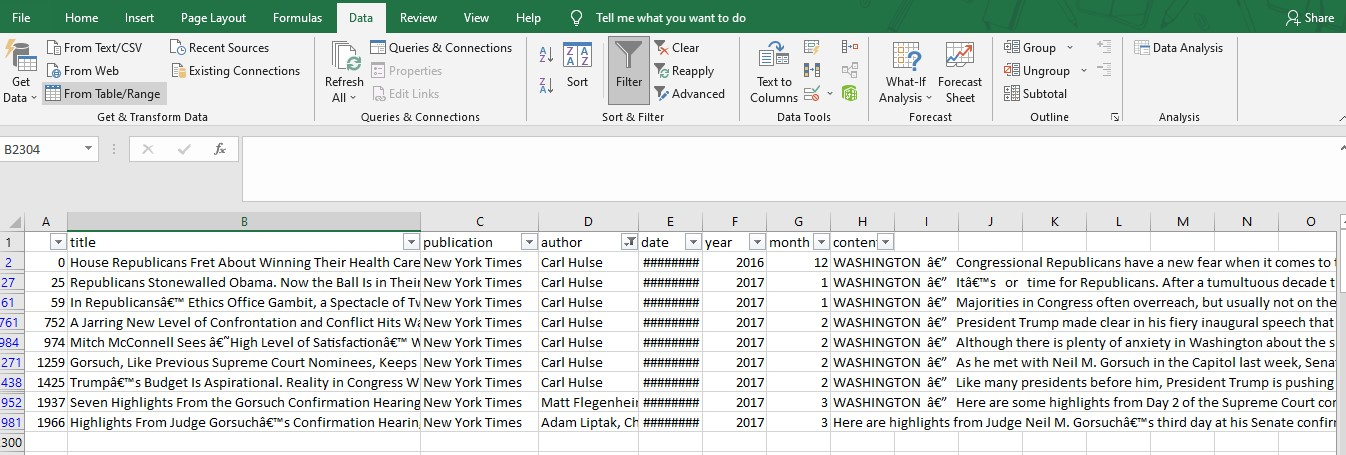

In [40]:
df4.isnull().sum()

title              0
publication        0
author             0
date               0
month              0
year               0
cleaned_content    0
dtype: int64

# Write a data frame query to find all names of UNIQUE sources and retrieve their count i.e., number of articles from each source

In [41]:
pub_count = df4.groupby(['publication']).agg({'title':'count'}).sort_values(by=['title'],ascending=False).reset_index()
pub_count.head(10)

,publication,title
0,New York Times,1754
1,Guardian,238
2,Atlantic,226
3,Senator,1


 *  **Create a suitable visualization representing each news source and number of articles. Which news websites has the maximum number of articles?**



In [42]:
pub_count_cleaned= pub_count.drop(3)
pub_count_cleaned.head(10)


,publication,title
0,New York Times,1754
1,Guardian,238
2,Atlantic,226


**NEW YORK TIMES** has the maximum number of articles at **1754**

* Perform the same process to get names of all authors and articles written by each. Plot a visualization for the same

In [43]:
author_article = df4.groupby(['author']).agg({'title':'count'}).sort_values(by=['title'],ascending=False).reset_index()
author_article.head(20)

,author,title
0,Charles McDermid,17
1,Karen Zraick and Sandra Stevenson,17
2,Mike McPhate,16
3,Julie Hirschfeld Davis,15
4,Christine Hauser,14
5,Choe Sang-Hun,14
6,Liam Stack,13
7,Dave Itzkoff,12
8,Karen Zraick and Lisa Iaboni,12
9,Adam Liptak,12


# Have 2 or more authors written more than 1 article together? 
   
   If yes, represent with a suitable visualization/ table with names of authors who have collaborated/ worked together and the count/number of the articles for each pair.

In [44]:
df5= df4.copy(deep=True)

In [45]:
df5['2+authors']= df5['author'].str.contains(" and ", ',') #to filter 2 or more authors as they are joined with ' and ' and ','
df5

,title,publication,author,date,month,year,cleaned_content,2+authors
0,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,31-12-2016,12,2016,washington congressional republican new fear c...,False
1,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,19-06-2017,6,2017,bullet shell get counted blood dry votive cand...,True
2,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,06-01-2017,1,2017,walt disney bambi opened 1942 critic praised s...,False
3,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,10-04-2017,4,2017,death may great equalizer necessarily evenhand...,False
4,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,02-01-2017,1,2017,seoul south korea north korea leader kim said ...,False
...,...,...,...,...,...,...,...,...
2301,FBI director Comey faces fury for cryptic lett...,Guardian,David Smith,29-10-2016,10,2016,http www theguardian com us-news 2016 oct 29 f...,False
2302,NFL denies sending Donald Trump a letter about...,Guardian,Martin Pengelly,31-07-2016,7,2016,http www theguardian com us-news 2016 jul 31 n...,False
2304,New York and Minnesota show how DIY terrorism ...,Guardian,Aki Peritz,19-09-2016,9,2016,http www theguardian com commentisfree 2016 se...,False
2305,The Good Place: Kristen Bell’s afterlife comed...,Guardian,Brian Moylan,19-09-2016,9,2016,http www theguardian com tv-and-radio 2016 sep...,False


In [46]:
two_auth = df5.loc[df5['2+authors'] == True][['author','title']]
two_auth.tail(20)

,author,title
1900,"Benjamin Mueller, Emily Palmer and Al Baker",Man Charged With Murder in Death of Emergency ...
1907,Abby Goodnough and Jonathan Martin,G.O.P.’s Health Care Tightrope Winds Through t...
1922,Damien Cave and Justin Gillis,Large Sections of Australia’s Great Reef Are N...
1933,"Matt Apuzzo, Matthew Rosenberg and Emmarie Hue...","F.B.I. Is Investigating Trump’s Russia Ties, C..."
1939,Karen Zraick and Sandra Stevenson,"Gorsuch, Rockefeller, Brady: Your Monday Eveni..."
1940,Gretchen Morgenson and Geraldine Fabrikant,Hedge Fund Titan’s Surefire Bet Turns Into a $...
1957,"Julie Hirschfeld Davis, Thomas Kaplan and Robe...",Trump Warns House Republicans: Repeal Health L...
1959,"Matt Flegenheimer, Adam Liptak, Carl Hulse and...",Seven Highlights From the Gorsuch Confirmation...
1960,"Ron Nixon, Adam Goldman and Eric Schmitt",Devices Banned on Flights From 10 Countries Ov...
1963,Glenn Thrush and Maggie Haberman,Trump’s Weary Defenders Face Fresh Worries - T...


In [47]:
df6 = two_auth.groupby(['author']).agg({'title':'count'}).sort_values(by=['title'],ascending=False).reset_index()
df6

,author,title
0,Karen Zraick and Sandra Stevenson,17
1,Karen Zraick and Lisa Iaboni,12
2,Glenn Thrush and Maggie Haberman,7
3,Anna Dubenko and Michelle L. Dozois,5
4,Thomas Kaplan and Robert Pear,4
...,...,...
332,Glenn Thrush and Jennifer Steinhauer,1
333,Giovanni Russonello and Daniel Victor,1
334,Gina Kolata and Jan Hoffman,1
335,Gerry Mullany and Michelle Innis,1


**Two or more authors and their count of articles cleaned and represented in a dataframe below**

In [48]:
df7 = df6[df6['title']>1]
df7.head(30)

,author,title
0,Karen Zraick and Sandra Stevenson,17
1,Karen Zraick and Lisa Iaboni,12
2,Glenn Thrush and Maggie Haberman,7
3,Anna Dubenko and Michelle L. Dozois,5
4,Thomas Kaplan and Robert Pear,4
5,Peter Baker and Maggie Haberman,4
6,Richard C. Paddock and Choe Sang-Hun,3
7,Robert Pear and Thomas Kaplan,3
8,Julie Hirschfeld Davis and Maggie Haberman,3
9,Brooks Barnes and Cara Buckley,3


#NER

In [49]:
import spacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [50]:
df4.head()

,title,publication,author,date,month,year,cleaned_content
0,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,31-12-2016,12,2016,washington congressional republican new fear c...
1,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,19-06-2017,6,2017,bullet shell get counted blood dry votive cand...
2,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,06-01-2017,1,2017,walt disney bambi opened 1942 critic praised s...
3,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,10-04-2017,4,2017,death may great equalizer necessarily evenhand...
4,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,02-01-2017,1,2017,seoul south korea north korea leader kim said ...


In [52]:
df20= df.copy(deep=True) #keyerror 65 in lemmatisation of title df4 
df21 = df20.loc[:, ~df20.columns.str.match('Unnamed')]
#content data cleaning

cleaned_title=[]
#the stemmer requires a language parameter
#ss = SnowballStemmer(language='english')
lemmatizer = WordNetLemmatizer()
for i in range(len(df21)):
  C9= re.sub('[^A-Za-z0-9-]',' ',str(df21['title'][i])) # punctuation removal
  C9= C9.lower() # lowering alphabet
  C9= nltk.word_tokenize(C9) # tokenization
  C9= [lemmatizer.lemmatize(word2) for word2 in C9 if word2 not in stopwords.words('english')] # stopwords removal and stemming
  C9= " ".join(C9)
  cleaned_title.append(C9)
cleaned_title

['house republican fret winning health care suit - new york time',
 'rift officer resident killing persist south bronx - new york time',
 'tyrus wong bambi artist thwarted racial bias dy 106 - new york time',
 'among death 2016 heavy toll pop music - new york time',
 'kim jong-un say north korea preparing test long-range missile - new york time',
 'sick cold queen elizabeth miss new year service - new york time',
 'taiwan president accuses china renewed intimidation - new york time',
 'biggest loser body fought regain weight - new york time',
 'first mixtape romance - new york time',
 'calling angel enduring trial job - new york time',
 'weak federal power could limit trump climate-policy rollback - new york time',
 'carbon capture technology prosper trump - new york time',
 'mar-a-lago future winter white house home calmer trump - new york time',
 'form healthy habit 20 - new york time',
 'turning vacation photo work art - new york time',
 'second avenue subway open train delay end ha

In [53]:
tokens = nlp(''.join(str(df4.title.tolist())))

In [54]:
items = [x.text for x in tokens.ents]
Counter(items).most_common(20)

[("The New York Times'", 880),
 ('Trump', 128),
 ('U.S.', 48),
 ('Donald Trump', 45),
 ('Russia', 22),
 ('Republicans', 19),
 ('China', 19),
 ('California', 16),
 ('First', 15),
 ('North Korea', 14),
 ('America', 13),
 ('South Korea', 13),
 ('Syria', 12),
 ('Democrats', 12),
 ('Obama', 11),
 ('Wednesday', 10),
 ('Friday', 10),
 ('Russian', 10),
 ('Turkey', 9),
 ('Monday', 9)]

**Spacy** recognises following entities

* `PERSON`:      People, including fictional.
* `NORP`:        Nationalities or religious or political groups.
* `FAC`:         Buildings, airports, highways, bridges, etc.
* `ORG`:         Companies, agencies, institutions, etc.
* `GPE`:         Countries, cities, states.
* `LOC`:         Non-GPE locations, mountain ranges, bodies of water.
* `PRODUCT`:     Objects, vehicles, foods, etc. (Not services.)
* `EVENT`:       Named hurricanes, battles, wars, sports events, etc.
* `WORK_OF_ART`: Titles of books, songs, etc.
* `LAW`:         Named documents made into laws.
* `LANGUAGE`:    Any named language.
* `DATE`:        Absolute or relative dates or periods.
* `TIME`:        Times smaller than a day.
* `PERCENT`:     Percentage, including ”%“.
* `MONEY`:       Monetary values, including unit.
* `QUANTITY`:    Measurements, as of weight or distance.
* `ORDINAL`:     “first”, “second”, etc.
* `CARDINAL`:    Numerals that do not fall under another type.

In [55]:
person_list = []
for ent in tokens.ents:
    if ent.label_ == 'PERSON':
        person_list.append(ent.text)
        
person_counts = Counter(person_list).most_common(20)
df_person = pd.DataFrame(person_counts, columns =['text', 'count'])
df_person.head(20)

,text,count
0,Trump,64
1,Donald Trump,45
2,Kim Jong-nam,9
3,Betsy DeVos,8
4,Clinton,7
5,Brexit,7
6,Kim Jong-un,6
7,Rex Tillerson,6
8,François Fillon,6
9,Hillary Clinton,5


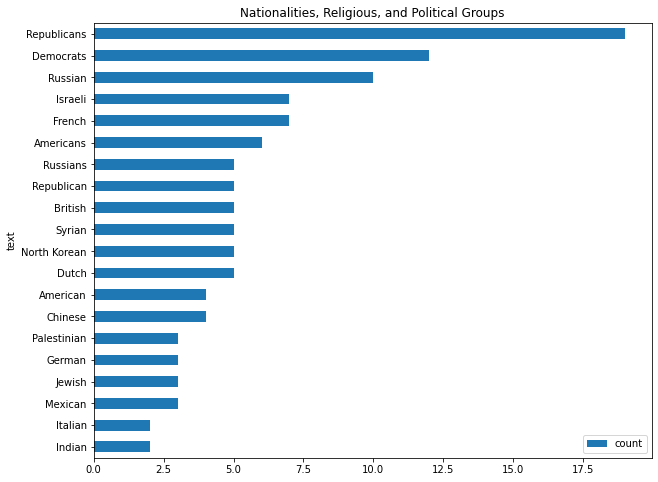

In [56]:
norp_list = []
for ent in tokens.ents:
    if ent.label_ == 'NORP':
        norp_list.append(ent.text)
        
norp_counts = Counter(norp_list).most_common(20)
df_norp = pd.DataFrame(norp_counts, columns =['text', 'count'])
df_norp.plot.barh(x='text', y='count', title="Nationalities, Religious, and Political Groups", figsize=(10,8)).invert_yaxis()

In [57]:
org_list = []
for ent in tokens.ents:
    if ent.label_ == 'ORG':
        org_list.append(ent.text)
        
org_counts = Counter(org_list).most_common(20)
df_org = pd.DataFrame(org_counts, columns =['text', 'count'])
df_org.head(10)

,text,count
0,The New York Times',880
1,White House,8
2,House,4
3,NBC,4
4,Fox News,4
5,Fed,4
6,Congress,4
7,'Republican Party,3
8,Senate,3
9,Volkswagen,3


In [58]:
txt= df4['cleaned_content'].loc[0]
txt

'washington congressional republican new fear come health care lawsuit obama administration might win incoming trump administration could choose longer defend executive branch suit challenge administration authority spend billion dollar health insurance subsidy american handing house republican big victory issue sudden loss disputed subsidy could conceivably cause health care program implode leaving million people without access health insurance republican prepared replacement could lead chaos insurance market spur political backlash republican gain full control government stave outcome republican could find awkward position appropriating huge sum temporarily prop obama health care law angering conservative voter demanding end law year another twist donald j trump administration worried preserving executive branch prerogative could choose fight republican ally house central question dispute eager avoid ugly political pileup republican capitol hill trump transition team gaming handle la

In [59]:
from spacy import displacy

In [60]:
doc= nlp(txt)
displacy.render(doc,style='ent',jupyter=True)